In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag
import matplotlib.pyplot as plt

In [58]:
directions = ipmag.fishrot(n=30,dec=0,inc=45)
decs, incs, moment = ipmag.unpack_di_block(directions)
mean_direction = ipmag.fisher_mean(dec=decs,inc=incs)
ipmag.print_direction_mean(mean_direction)

Dec: 353.9  Inc: 43.9
Number of directions in mean (n): 30
Angular radius of 95% confidence (a_95): 5.4
Precision parameter (k) estimate: 24.4


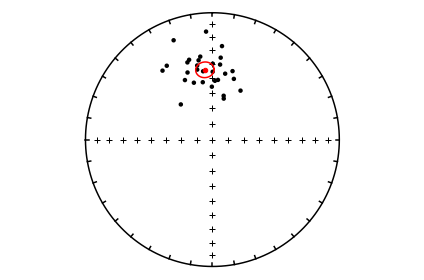

In [59]:
ipmag.plot_net()
ipmag.plot_di(dec=decs,inc=incs)
ipmag.plot_di_mean(mean_direction['dec'],mean_direction['inc'],mean_direction['alpha95'],color='red')

In [60]:
squished_incs = ipmag.squish(incs,0.6)
squished_mean_direction = ipmag.fisher_mean(dec=decs,inc=squished_incs)
ipmag.print_direction_mean(squished_mean_direction)

Dec: 354.3  Inc: 30.8
Number of directions in mean (n): 30
Angular radius of 95% confidence (a_95): 5.7
Precision parameter (k) estimate: 22.2


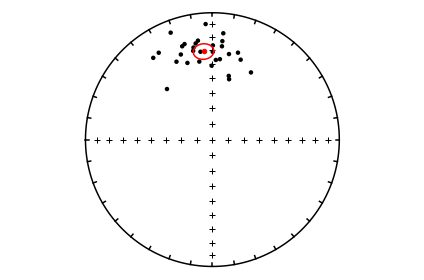

In [61]:
ipmag.plot_net()
ipmag.plot_di(dec=decs,inc=squished_incs)
ipmag.plot_di_mean(squished_mean_direction['dec'],squished_mean_direction['inc'],
                   squished_mean_direction['alpha95'],color='red')

In [62]:
ipmag.unsquish(squished_mean_direction['inc'],0.6)

44.82768907942427

In [63]:
unsquished_incs = ipmag.unsquish(squished_incs,0.6)
unsquished_mean_direction = ipmag.fisher_mean(dec=decs,inc=unsquished_incs)
ipmag.print_direction_mean(unsquished_mean_direction)

Dec: 353.9  Inc: 43.9
Number of directions in mean (n): 30
Angular radius of 95% confidence (a_95): 5.4
Precision parameter (k) estimate: 24.4


In [66]:
mean_v_site_diff_list = []

for i in range(0,1000):
    directions = ipmag.fishrot(n=30,dec=0,inc=45)
    decs, incs, moment = ipmag.unpack_di_block(directions)
    mean_direction = ipmag.fisher_mean(dec=decs,inc=incs)
    squished_incs = ipmag.squish(incs,0.6)
    squished_mean_direction = ipmag.fisher_mean(dec=decs,inc=squished_incs)
    unsquished_mean_inc = ipmag.unsquish(squished_mean_direction['inc'],0.6)
    mean_v_site_diff = unsquished_mean_inc - mean_direction['inc']
    mean_v_site_diff_list.append(mean_v_site_diff)

(array([ 20., 108., 214., 264., 191., 118.,  60.,  17.,   5.,   3.]),
 array([0.46265128, 0.66218883, 0.86172638, 1.06126393, 1.26080148,
        1.46033903, 1.65987658, 1.85941413, 2.05895168, 2.25848923,
        2.45802678]),
 <a list of 10 Patch objects>)

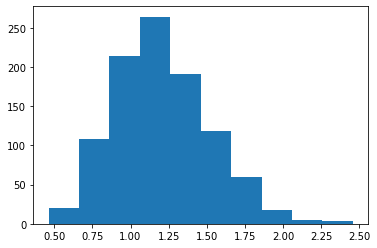

In [67]:
plt.hist(mean_v_site_diff_list)